In [112]:
# First let's import the packages we will use in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\ahyar\Downloads\movies.csv\movies.csv')

In [79]:
# Now let's take a look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [80]:
# check info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [81]:
# check if any duplicate
df.duplicated().sum()

0

In [82]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
   # print('{} - {}%'.format(col, round(pct_missing*100)))
    print(f'{col}-{round(pct_missing*100)}%')

name-0%
rating-1%
genre-0%
year-0%
released-0%
score-0%
votes-0%
director-0%
writer-0%
star-0%
country-0%
budget-28%
gross-2%
company-0%
runtime-0%


In [83]:
# another way to check missing data
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [84]:
# drop missing data
# I just wanna drop all of them that's mean i will lost 28% of data, so consider to drop missing data
df = df.dropna()
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [85]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [89]:
# change data type of column

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [99]:
# create correct year column

df['correct_year'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [91]:
#sort value by gross
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

df.head()



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


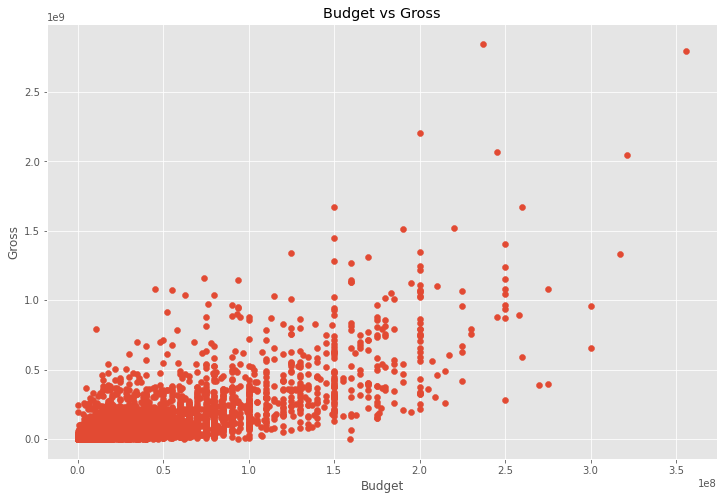

In [92]:
# scatter plot budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

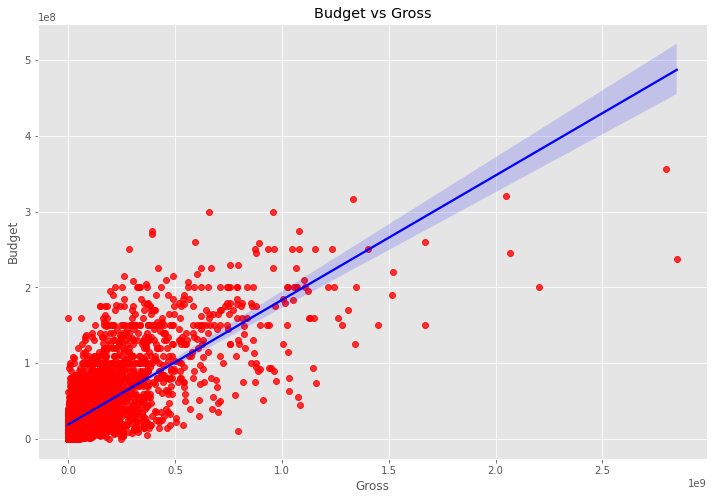

In [93]:
sns.regplot(x='gross', y='budget', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

plt.title('Budget vs Gross')
plt.xlabel('Gross')
plt.ylabel('Budget')
plt.show()

In [94]:
# Let's start looking at correlation
#pd.set_option('display.max_row', None)

# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

# other methods = kendal, spearman

,year,score,votes,budget,gross,runtime,correct_year
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
correct_year,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


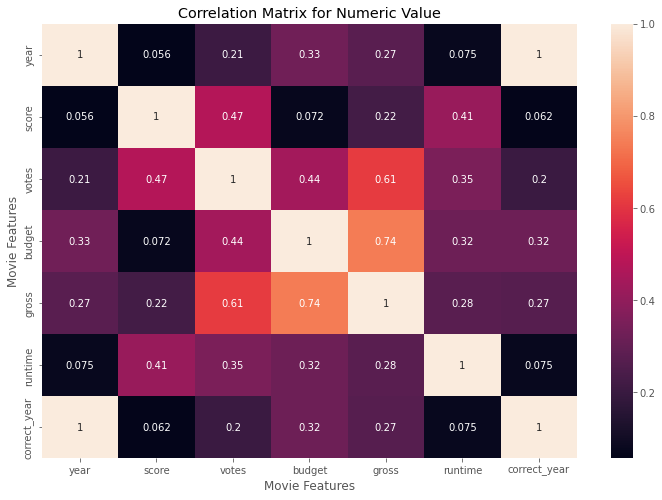

In [95]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Value')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [96]:
# Look at the company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [97]:
df.dtypes

name             object
rating           object
genre            object
year              int64
released         object
score           float64
votes           float64
director         object
writer           object
star             object
country          object
budget            int64
gross             int64
company          object
runtime         float64
correct_year      int32
dtype: object

In [103]:
# Using factorize - this assigns a random numeric value for each unique categorical value


df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
name,1.000000,0.314800,0.186668,0.267282,0.667785,0.136453,0.608411,0.679808,0.764057,0.599410,0.124405,0.526690,0.986431,0.631721,0.089567,0.262849
rating,0.314800,1.000000,0.031419,0.096638,0.241253,-0.075109,0.121122,0.230190,0.251470,0.226007,0.111309,0.283770,0.319778,0.269792,0.029208,0.087261
genre,0.186668,0.031419,1.000000,0.075279,0.115079,0.047421,0.177836,0.131437,0.129595,0.143735,-0.055109,0.175071,0.185075,0.080643,0.011329,0.071750
year,0.267282,0.096638,0.075279,1.000000,0.359792,0.045163,0.286895,0.186504,0.231664,0.240670,-0.047325,0.190333,0.277721,0.136096,0.037011,0.949995
released,0.667785,0.241253,0.115079,0.359792,1.000000,0.099608,0.481682,0.478950,0.541155,0.439566,0.095519,0.396934,0.677897,0.410407,0.058183,0.358544
score,0.136453,-0.075109,0.047421,0.045163,0.099608,1.000000,0.247863,0.176116,0.122357,0.139126,-0.057087,-0.005767,0.139819,0.022732,0.057866,0.053108
votes,0.608411,0.121122,0.177836,0.286895,0.481682,0.247863,1.000000,0.472671,0.522918,0.429085,0.013363,0.317842,0.620450,0.346864,0.088525,0.287857
director,0.679808,0.230190,0.131437,0.186504,0.478950,0.176116,0.472671,1.000000,0.642875,0.504992,0.123672,0.443150,0.692902,0.528071,0.084943,0.190556
writer,0.764057,0.251470,0.129595,0.231664,0.541155,0.122357,0.522918,0.642875,1.000000,0.510628,0.138299,0.449523,0.776528,0.532013,0.066645,0.230543
star,0.599410,0.226007,0.143735,0.240670,0.439566,0.139126,0.429085,0.504992,0.510628,1.000000,0.106459,0.457442,0.612142,0.455443,0.096652,0.242124


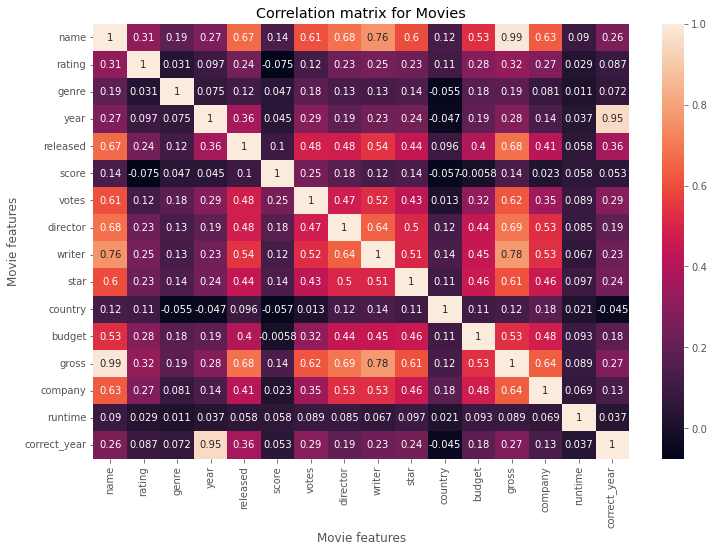

In [104]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [106]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018


In [108]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.025542
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.022021
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.069147
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.998726
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.005989
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.061923
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.203098
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.037371
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.025495
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.032687


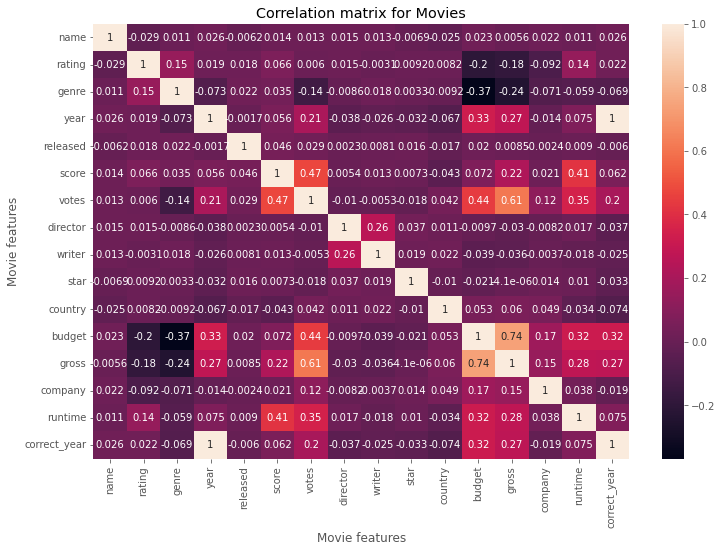

In [110]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [114]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name      name        1.000000
          rating      0.143938
          genre       0.036367
          year        0.965761
          released    0.959015
          score      -0.046733
          votes       0.287776
          director    0.745905
          writer      0.805211
          star        0.731565
          country     0.142828
          budget      0.277488
          gross       0.947324
          company     0.591667
          runtime     0.048955
rating    name        0.143938
          rating      1.000000
          genre      -0.086723
          year        0.156713
          released    0.146606
          score       0.012595
          votes       0.099972
          director    0.085520
          writer      0.103623
          star        0.093116
          country     0.000494
          budget      0.193353
          gross       0.158582
          company    -0.028035
          runtime     0.032741
genre     name        0.036367
          rating     -0.086723
        

In [116]:
sorted_pair = corr_pairs.sort_values()

sorted_pair

budget    company    -0.092249
company   budget     -0.092249
genre     rating     -0.086723
rating    genre      -0.086723
budget    country    -0.082082
country   budget     -0.082082
gross     score      -0.047041
score     gross      -0.047041
          name       -0.046733
name      score      -0.046733
votes     country    -0.045914
country   votes      -0.045914
released  score      -0.045761
score     released   -0.045761
year      score      -0.044981
score     year       -0.044981
writer    score      -0.034685
score     writer     -0.034685
company   score      -0.028432
score     company    -0.028432
company   rating     -0.028035
rating    company    -0.028035
director  score      -0.022687
score     director   -0.022687
genre     country    -0.015795
country   genre      -0.015795
score     budget     -0.012642
budget    score      -0.012642
runtime   director   -0.011070
director  runtime    -0.011070
score     star       -0.009896
star      score      -0.009896
score   

In [119]:
# We can now take a look at the ones that have a high correlation (> 0.5)
high_corr =sorted_pair[(sorted_pair)>0.5]

high_corr

star      company     0.527116
company   star        0.527116
          writer      0.546151
writer    company     0.546151
director  company     0.552258
company   director    0.552258
gross     company     0.588156
company   gross       0.588156
          name        0.591667
name      company     0.591667
year      company     0.601571
company   year        0.601571
released  company     0.607954
company   released    0.607954
writer    star        0.675685
star      writer      0.675685
director  star        0.682385
star      director    0.682385
name      star        0.731565
star      name        0.731565
gross     star        0.735680
star      gross       0.735680
director  name        0.745905
name      director    0.745905
writer    director    0.748340
director  writer      0.748340
gross     director    0.750911
director  gross       0.750911
released  star        0.754468
star      released    0.754468
year      star        0.756400
star      year        0.756400
year    

In [120]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64